# Perspective Transformation

In [21]:
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt

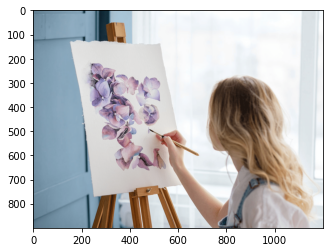

In [24]:
image_path = './custom_dataset/002/'
image_name = '002.png'

# Read the image
image = cv2.imread(image_path + image_name)

# Convert the image to the RGB color space
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image)
plt.show()

In [40]:
# Annotation json
json_path = './custom_dataset/annotation.json'

# Read json
with open(json_path, 'r') as f:
    data = json.load(f)

key = next(e for e in data if image_name in e)

all_points_x = data[key]['regions'][0]['shape_attributes']['all_points_x']
all_points_y = data[key]['regions'][0]['shape_attributes']['all_points_y']

In [51]:
points = []
for x, y in zip(all_points_x, all_points_y):
    points.append([x, y])

In [54]:
print(all_points_x, all_points_y)

[156, 252, 633, 525] [135, 769, 715, 141]


[[156. 135.]
 [525. 141.]
 [252. 769.]
 [633. 715.]] [[  0.   0.]
 [400.   0.]
 [  0. 500.]
 [400. 500.]]


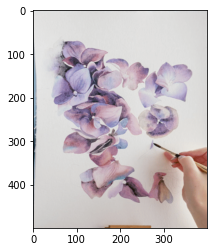

In [79]:
# Define the transformation matrix
pt1 = np.float32([points[0],points[3],points[1],points[2]])
# pt1 = np.float32([points[1],points[0],points[2],points[3]])
# pt2 = np.float32([[0,0],[image.shape[1],0],[0,image.shape[0]],[image.shape[1], image.shape[0]]])
pt2 = np.float32([[0,0],[400,0],[0,500],[400,500]])
print(pt1, pt2)
M = cv2.getPerspectiveTransform(pt1,pt2)

# Perform the transformation
warped_image = cv2.warpPerspective(image, M, (400, 500))

# Display the image
plt.imshow(warped_image)
plt.show()